In [3]:
import pandas as pd
import matplotlib.pyplot as plt # 2D grafikler çizmek için kullanıyoruz
import seaborn as sns # Daha gelişmiş grafikler çizmek için kullanıyoruz
import numpy as np # Aritmetik işlemler yapabilmek için 
from sklearn.cluster import KMeans # kümeleme işleri için

In [4]:
df = pd.read_csv("resources/resources/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.drop(labels="CustomerID",axis=1,inplace=True) #CustomerID istediğimiz bir veri değil 
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [6]:
df.shape #200 satır 5 de sütunumuz var

(200, 4)

In [7]:
df.info() #Null alan yok 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [8]:
df.describe().T #Görüldüğü üzere sayısal sütunların gerekli değerlerini ele aldık 

,count,mean,std,min,25%,50%,75%,max
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0


In [16]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

<Figure size 1400x500 with 0 Axes>

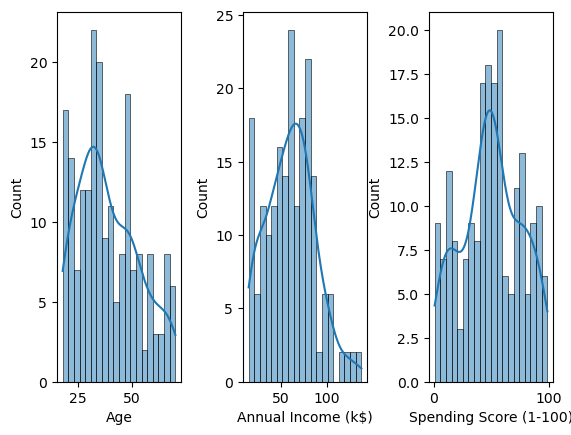

In [17]:
plt.figure(figsize=(14,5))# grafiğin boyunu belirledik.
fig,ax=plt.subplots(1,3) # bi satırda 3 tane yan yana grafik göstereceğiz.
plt.subplots_adjust(hspace=0.5,wspace=0.5) # grafikler arası boşluğu belirledik
y=0
for col in df.columns[1:]: #for döngüsüyle 2 den sonraki sütunların başlıkları üzerinde dolanıyoruz.
    sns.histplot(df[col],bins=20,kde=True,ax=ax[y]) # ax ile sütunların grafiğinin yerini belirliyoruz,kde=True ile dağılım gra-
    #fiği çizeriz
    y+=1

<AxesSubplot: xlabel='count', ylabel='Gender'>

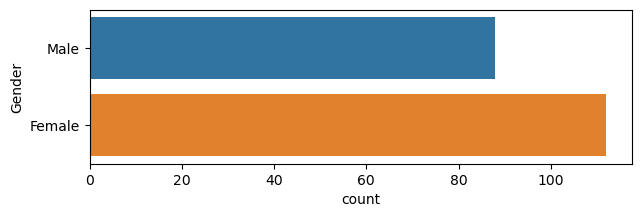

In [20]:
plt.figure(figsize=(7,2))
sns.countplot(y="Gender",data=df) #Girilen column adetlerini gösteren grafiği çizer

<Figure size 2000x1000 with 0 Axes>

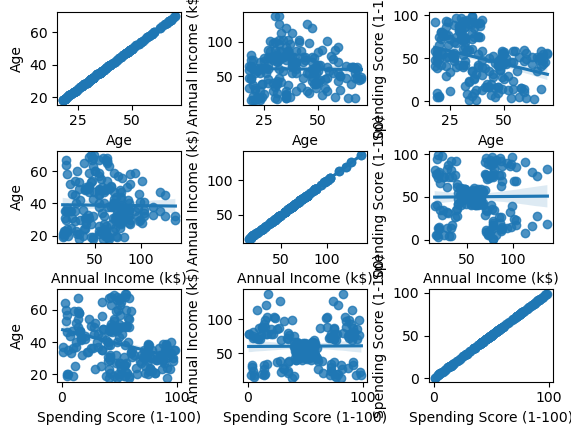

In [22]:
plt.figure(figsize=(20,10))
fig ,ax=plt.subplots(3,3) # 3 e 3 lük grafik çizeceğiz
plt.subplots_adjust(hspace=0.5,wspace=0.5) #grafikler arası bosluk
x=0
for first in df.columns[1:]:
    y=0
    for second in df.columns[1:]:
        sns.regplot(x=first,y=second,data=df,ax=ax[x,y])#seaborn regresyon grafiği çizdiriyoruz
        y+=1
    x+=1

<AxesSubplot: >

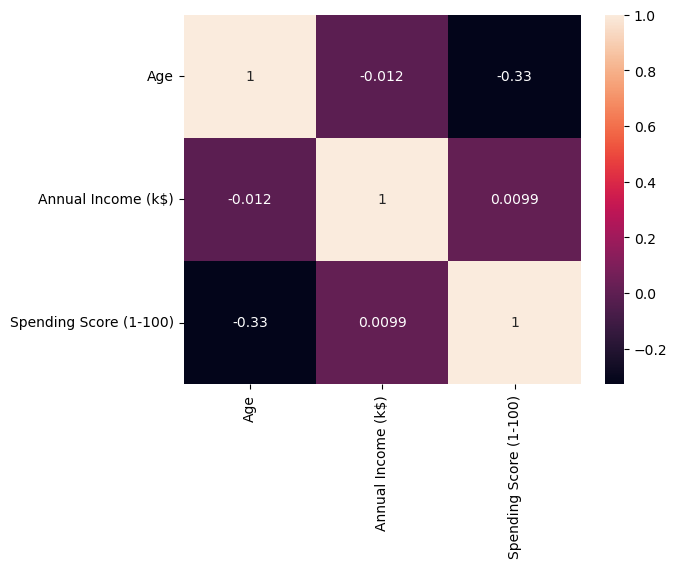

In [38]:
sns.heatmap(df.corr(),annot=True) # korelasyon ilişkisi tablosu

<AxesSubplot: xlabel='Age', ylabel='Annual Income (k$)'>

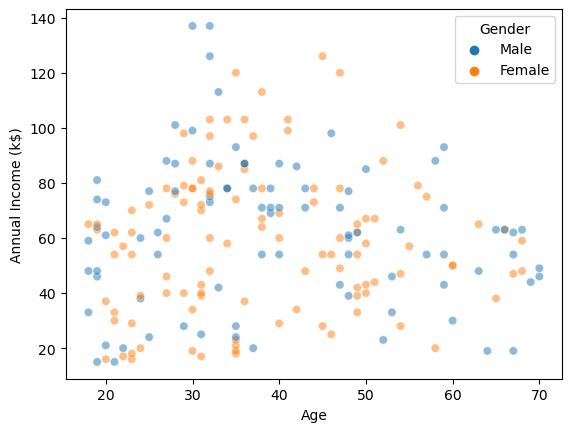

In [40]:
sns.scatterplot(x="Age",y="Annual Income (k$)",data=df,hue="Gender",alpha=0.5)
# Age ile Annual Income arasındaki nokta dağılım grafiği ve cinsiyete göre renklendirmesi

In [45]:
X = df[df.columns[1:]]
#Giriş değişkenlerimizi belirledik

In [47]:
uzaklik = []
for n in range(1,11):
    model = KMeans(n_clusters=n,init='k-means++',n_init=10,max_iter=300,tol=0.0001,random_state=42)
    model.fit(X)
    uzaklik.append(model.inertia_)#bir veri setinin K-Means tarafından ne kadar iyi kümelendiğini ölçer

(Text(0.5, 0, 'Küme Sayısı'), Text(0, 0.5, 'Uzaklık'))

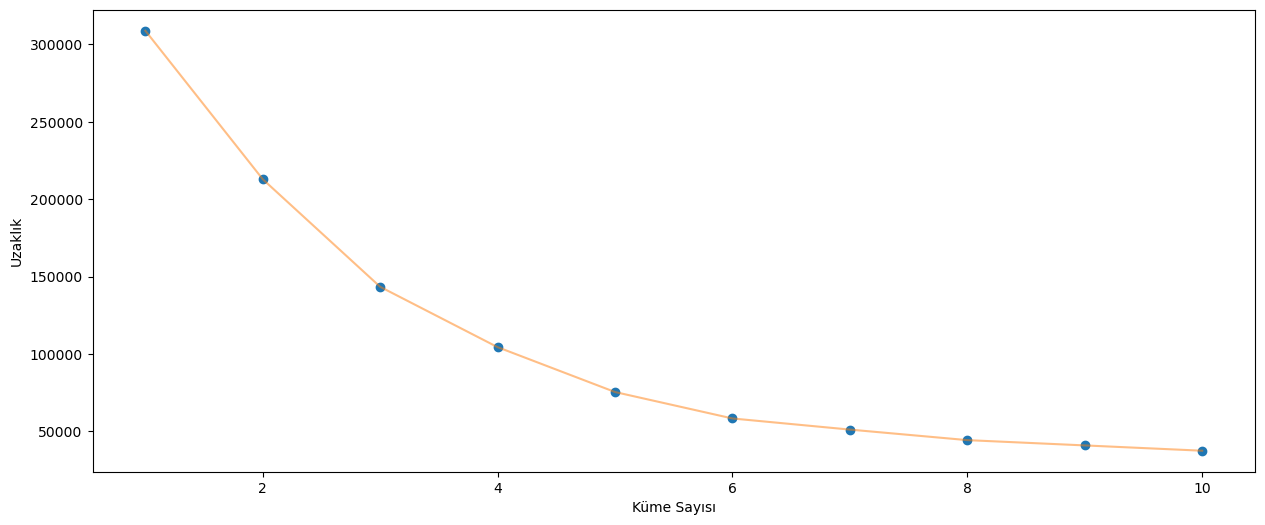

In [51]:
plt.figure(1,figsize=(15,6)) # Grafiğin diresek yaptığı nokta optimum noktadır bu grafik için değeri 4
plt.plot(np.arange(1, 11),uzaklik,'o') # grafik üzerindeki noktaları çizer
plt.plot(np.arange(1, 11),uzaklik,'-', alpha=0.5) # Grafiğin çizgilerini çizer
plt.xlabel('Küme Sayısı') , plt.ylabel('Uzaklık') #X ve Y ekseninin ismini veririz

In [52]:
#Dirsek noktasu 4 olarak gözüküyor en iyi kümeleme 4 küme ile yapılır

In [54]:
model = (KMeans(n_clusters=4,init='k-means++',n_init=10,max_iter=300,
              tol=0.0001,random_state=42,algorithm='elkan'))
model.fit(X)
new_labels = model.labels_
merkezler = model.cluster_centers_

In [61]:
new_labels #

array([2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3])

In [63]:
print(len(merkezler))
print(len(merkezler[0]))

4
3
